## Análise de dados

In [23]:
#Importação de bibliotecas necessárias para o projeto
import numpy as np
import pandas as pd
from IPython.display import display # Permite o uso de display() para DataFrames
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plt
import scipy as scipy
import missingno as msno
from scipy.stats.stats import pearsonr
from collections import Counter
import seaborn as sns
# Pretty display for notebooks
%matplotlib inline

# Carregando os conjuntos de dados de treinamento e teste
full_data = pd.read_csv('train_Porto_Seguro.csv') 
full_data_test= pd.read_csv('test_Porto_Seguro.csv')

#Imprime as primeiras entradas dos datasets
#display(full_data.head(10))
#display(full_data_test.head(10))

In [24]:
# Padronização da impressão dos gráficos
padrao={'savefig.dpi': 75, 'figure.autolayout': False, 'figure.figsize': [20, 8], 'axes.labelsize': 18,\
   'axes.titlesize': 18, 'font.size': 18, 'lines.linewidth': 2.0, 'lines.markersize': 8, 'legend.fontsize': 15,\
   'xtick.labelsize': 12, 'ytick.labelsize': 16} 
 
sns.set(style='dark',rc=padrao) 

### Exploração de dados 

In [25]:
rows = full_data.shape[0]
columns = full_data.shape[1]
print("O conjunto de dados de treinamento tem {0} linhas e {1} colunas".format(rows, columns))

O conjunto de dados de treinamento tem 595212 linhas e 59 colunas


In [26]:
rows = full_data_test.shape[0]#linha
columns = full_data_test.shape[1]#coluna
print("O conjunto de dados de teste tem {0} linhas e {1} colunas".format(rows, columns))

O conjunto de dados de teste tem 892816 linhas e 58 colunas


In [27]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [28]:
#Código abaixo mostra a quantidade exata de linhas diferentes para a váriavel "id".
#Este código mostra que a variável "id" representa a identificação dos clientes, por este motivo esta variável pode ser
#removida do nosso conjundo de treinamento e do conjunto de teste.
full_data.id.value_counts().shape[0] #shape[0] para saber a quantidade exata de valores diferentes.


595212

In [29]:
#pessoas que não acionaram o sinistro
notclaim=sum(full_data['target'] == 0)  
# pessoas que acionaram o sinistro
claim=sum(full_data['target'] == 1)
total=claim + notclaim
resultado_claim=claim * 100/total
resultado_notclaim=notclaim * 100/total
print('A porcentagem de pessoas que acionaram um sinistro é de :', resultado_claim, "e a porcentagem de pessoas que não acionaram o seguro é de", resultado_notclaim)

A porcentagem de pessoas que acionaram um sinistro é de : 3.64475178592 e a porcentagem de pessoas que não acionaram o seguro é de 96.3552482141


In [30]:
#Código abaixo mostra a quantidade exata de acionamento de sinistros ou não.
qtde=full_data.target.value_counts()
qtde=DataFrame(qtde)
qtde

,target
0,573518
1,21694


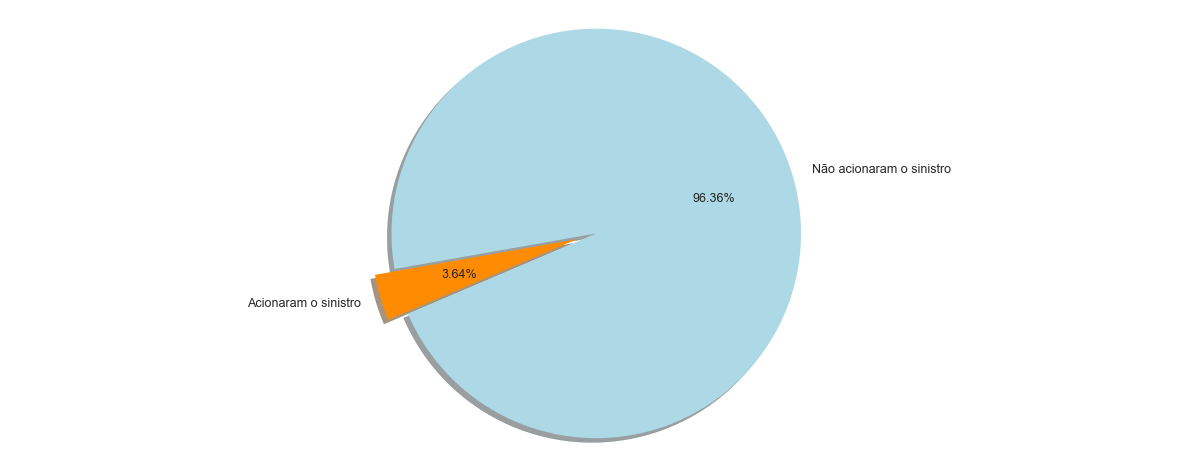

In [31]:
plt.rcParams.update({'font.size': 12}) 

plt.pie([resultado_claim, resultado_notclaim],
        colors=['darkorange', 'lightblue'],
        labels=['Acionaram o sinistro', 'Não acionaram o sinistro'], 
        explode = (0.1, 0),shadow=True,autopct='%1.2f%%',
        startangle=190)

plt.axis('equal')
plt.show()

### Verificação de duplicação 

In [32]:
#Vericação se há algum coluna com "id" duplicado.
full_data.set_index('id').index.get_duplicates()


[]

### Verificação de valores faltantes

In [33]:
#Verificando se existe algum valor nulo, e se existe quantos.
full_data.isnull().values.sum()

0

In [34]:
#Calculando a quantidade de valores diferentes para a váriavel "ps_car_11". Pode-se supor que -1 representa os valores
#nulos no dataset
vals=full_data.ps_car_11 .value_counts()
vals

 3    318919
 2    189353
 1     60952
 0     25983
-1         5
Name: ps_car_11, dtype: int64

In [35]:
#Processamento de dados
#Substituição dos valores de -1 para nulos.
full_data_missing = full_data
full_data_missing =full_data_missing.replace(-1, np.NaN)

In [36]:
colunas_valores_faltantes=pd.DataFrame(full_data_missing.isnull().sum(),columns=["Quantidade"])
contagem=colunas_valores_faltantes
a=contagem[contagem.Quantidade > 0]
a=pd.DataFrame(a.Quantidade/full_data_missing.shape[0] * 100)
a=a.applymap('{:,.2f}%'.format)
a = a.reset_index()
a=a.rename(columns={'index': 'Variaveis'})
a

,Variaveis,Quantidade
0,ps_ind_02_cat,0.04%
1,ps_ind_04_cat,0.01%
2,ps_ind_05_cat,0.98%
3,ps_reg_03,18.11%
4,ps_car_01_cat,0.02%
5,ps_car_02_cat,0.00%
6,ps_car_03_cat,69.09%
7,ps_car_05_cat,44.78%
8,ps_car_07_cat,1.93%
9,ps_car_09_cat,0.10%


In [37]:
colunas_valores_faltantes=pd.DataFrame(full_data_missing.isnull().sum(),columns=["Quantidade"])
contagem=colunas_valores_faltantes
a=contagem[contagem.Quantidade > 0]
a=pd.DataFrame(a.Quantidade/full_data_missing.shape[0] * 100)
#a=a.applymap('{:,.2f}'.format) #retirando a formação para gerar o gráfico sem erro
a = a.reset_index()
a=a.rename(columns={'index': 'Variaveis'})
a

,Variaveis,Quantidade
0,ps_ind_02_cat,0.036290
1,ps_ind_04_cat,0.013945
2,ps_ind_05_cat,0.975955
3,ps_reg_03,18.106490
4,ps_car_01_cat,0.017977
5,ps_car_02_cat,0.000840
6,ps_car_03_cat,69.089837
7,ps_car_05_cat,44.782531
8,ps_car_07_cat,1.930237
9,ps_car_09_cat,0.095596


In [38]:
print('Existe {} variáveis com valores faltantes'.format(len(a)))

Existe 13 variáveis com valores faltantes


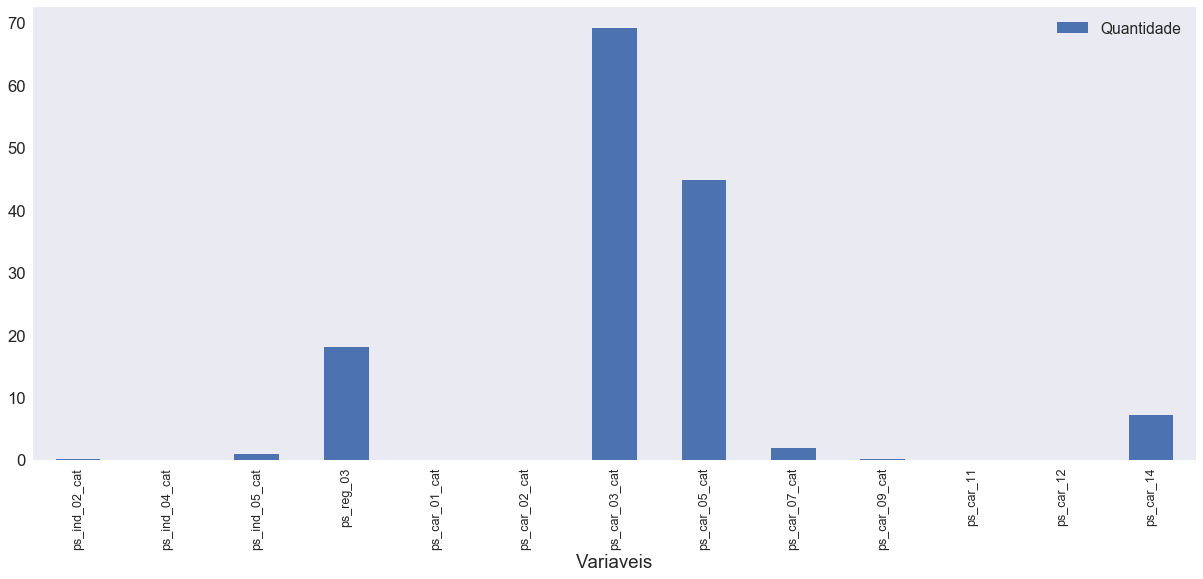

In [39]:
a.plot.bar(x=a.Variaveis)

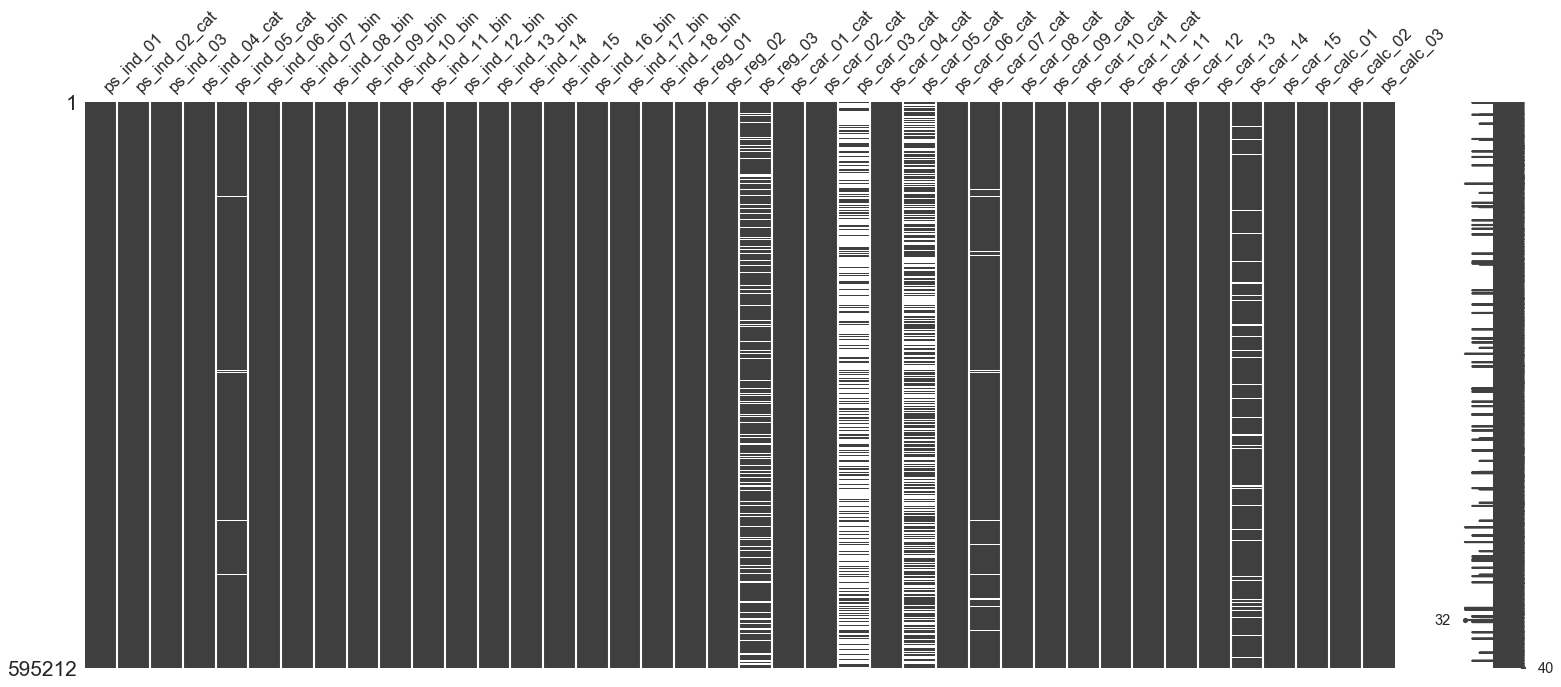

In [40]:
msno.matrix(df=full_data_missing.iloc[:,2:42])

### Processamento de dados - Organização dos tipos de dados - Categórico nominal, Ordinal, Binário e Intervalar.

Nesta próxima parte, as features vão ser organizadas em grupos iguais com o objetivo de visualizar os dados de uma maneira que possa ser possível analisar e encontrar padrões.

In [41]:
data = []
for col in full_data_missing.columns:
    global grupo
    # Definindo a role
    if col == 'target':
        role = 'target'
    elif col == 'id':
        role = 'id'
    else:
        role = 'input'
        
    # Definindo o nível
    if 'bin' in col or col == 'target':
        level = 'binaria'
    elif 'cat' in col or col == 'id':
        level = 'nominal' #categorica nominal
    elif full_data_missing[col].dtype == np.float64:
        level = 'intervalar'
    elif full_data_missing[col].dtype == np.int64:
        level = 'ordinal'
    else:
        pass
        
    # Definindo o grupo
        
    if col == 'target' or col == 'id':
        grupo='nogroup'
            
    elif 'ind' in col:
        grupo = 'ind'
    elif 'reg' in col:
        grupo = 'reg'
    elif 'car' in col:
        grupo = 'car'
    elif 'calc' in col:
        grupo = 'calc'
    else: 
        pass
            
    # Inicializando keep para verdadeiro para todas as variáveis exceto para id
    keep = True
    if col == 'id':
        keep = False

    # Definindo o tipo de dados
    dtype = full_data_missing[col].dtype

    #Criando um dicionário que contém todos os metadados para a variável
    col_dict = {'nome_variavel': col,
                'role'   : role,
                'nivel'  : level,
                'keep'   : keep,
                'grupo'  : grupo,
                'tipo'  : dtype
                }
        
    data.append(col_dict)

metadados = pd.DataFrame(data, columns=['role', 'nivel', 'keep','nome_variavel', 'grupo', 'tipo'])
metadados.set_index('nome_variavel', inplace=True)
#Código por Bert Carremans e modificada por Cibele Castelo
#Referência:Bert Carremans.Data Preparation & Exploration. Disponível em:<https://www.kaggle.com/bertcarremans/data-preparation-exploration>

In [42]:
metadados.head()

,role,nivel,keep,grupo,tipo
nome_variavel,,,,,
id,id,nominal,False,nogroup,int64
target,target,binaria,True,nogroup,int64
ps_ind_01,input,ordinal,True,ind,int64
ps_ind_02_cat,input,nominal,True,ind,float64
ps_ind_03,input,ordinal,True,ind,int64


In [43]:
#Acessando o indíce da varíavel, 'ps_ind_02_cat', pode-se ver todos os metadados relacionados a esta variavel, isto
#permite verificar de forma rápida informações sobre a variavel.
metadados.loc['ps_ind_02_cat']

role       input
nivel    nominal
keep        True
grupo        ind
tipo     float64
Name: ps_ind_02_cat, dtype: object

In [44]:
#Armazenando os indices dos diferentes tipos de dados
col_ordinal   = metadados[(metadados.nivel == 'ordinal') & (metadados.keep)].index 
col_nominal   = metadados[(metadados.nivel == 'nominal') & (metadados.keep)& (metadados.role != 'id')].index
col_intervalar = metadados[(metadados.nivel == 'intervalar') & (metadados.keep)].index 
col_binaria    = metadados[(metadados.nivel == 'binaria') & (metadados.keep) & (metadados.role != 'target')].index

In [45]:
#Colocando em dataframes separados os diferentes tipos de variáveis
coluna_ordinal=full_data_missing[col_ordinal]
coluna_nominal=full_data_missing[col_nominal]
coluna_intervalar=full_data_missing[col_intervalar]
coluna_binaria=full_data_missing[col_binaria]

In [46]:
#Estatistica básica
display(coluna_ordinal.describe())
display(coluna_nominal.describe())

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
count,594996.000000,595129.000000,589403.000000,595105.000000,595207.000000,183981.000000,595212.000000,328661.000000,595212.000000,583723.000000,595212.000000,594643.000000,595212.000000,595212.000000
mean,1.359799,0.416992,0.419038,8.297605,0.829947,0.601741,0.725192,0.525365,6.555340,0.947621,0.832080,1.331118,0.992136,62.215674
std,0.663193,0.493062,1.350023,2.505396,0.375680,0.489541,2.153463,0.499357,5.501445,0.222791,0.373796,0.976559,0.091619,33.012455
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000
50%,1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000
75%,2.000000,1.000000,0.000000,11.000000,1.000000,1.000000,0.000000,1.000000,11.000000,1.000000,1.000000,2.000000,1.000000,93.000000
max,4.000000,1.000000,6.000000,11.000000,1.000000,1.000000,9.000000,1.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000


In [47]:
# Criação de amostras para cada tipo de dados
coluna_ordinal_sample=coluna_ordinal.sample(frac=0.5)
coluna_intervalar_sample=coluna_intervalar.sample(frac=0.5)
coluna_binaria_sample=coluna_binaria.sample(frac=0.5)
coluna_nominal_sample=coluna_nominal.sample(frac=0.5)

In [48]:
variacao_valores=full_data_missing['ps_car_02_cat']
variacao_valores.value_counts().shape[0] #shape[0] para saber a quantidade exata de valores diferentes.

2

### CATEGÓRICAS NOMINAIS

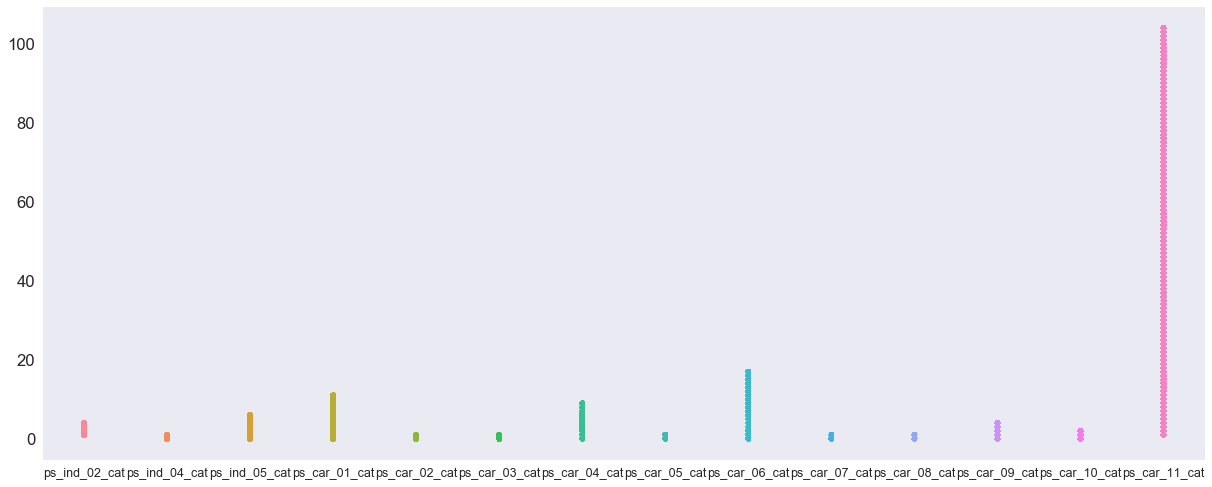

In [49]:
#Gráfico STRIPPLOT 
ax = sns.stripplot(data=coluna_nominal_sample)

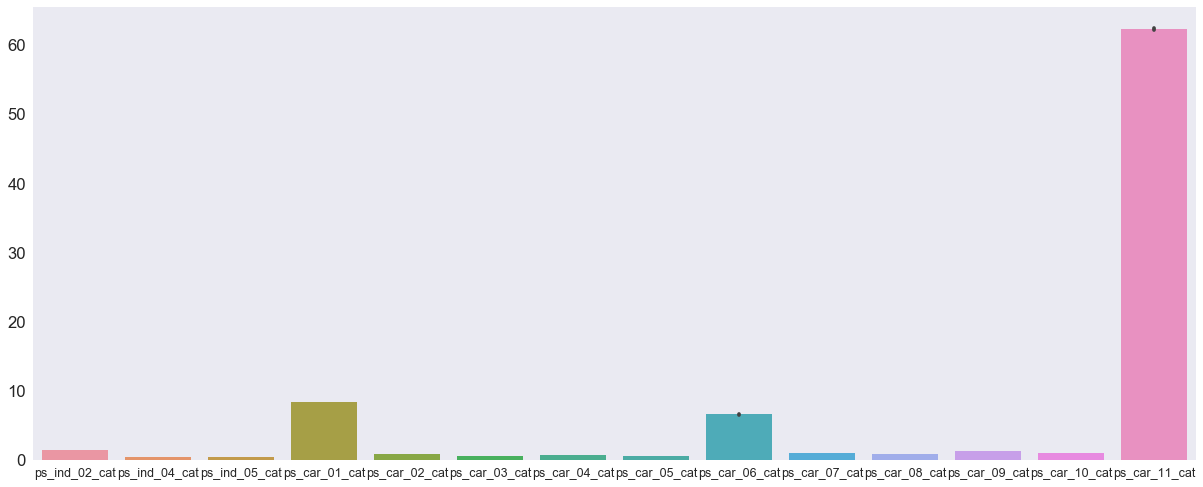

In [50]:
#Gráfico de barra das variáveis categóricas - permite visualizar a frequência
sns.barplot(data=coluna_nominal_sample)

In [51]:
#Loop que calcula para cada variavel categórica nominal o respectivo valor da quantidade de 
#diferentes valores que a váriavel apresenta
for col in col_nominal:
    qtde_diferente=full_data_missing[col].value_counts().shape[0] #shape[0] para saber a quantidade exata de valores diferentes.
    print("A variável",col,"possui",qtde_diferente,"valores diferentes")

A variável ps_ind_02_cat possui 4 valores diferentes
A variável ps_ind_04_cat possui 2 valores diferentes
A variável ps_ind_05_cat possui 7 valores diferentes
A variável ps_car_01_cat possui 12 valores diferentes
A variável ps_car_02_cat possui 2 valores diferentes
A variável ps_car_03_cat possui 2 valores diferentes
A variável ps_car_04_cat possui 10 valores diferentes
A variável ps_car_05_cat possui 2 valores diferentes
A variável ps_car_06_cat possui 18 valores diferentes
A variável ps_car_07_cat possui 2 valores diferentes
A variável ps_car_08_cat possui 2 valores diferentes
A variável ps_car_09_cat possui 5 valores diferentes
A variável ps_car_10_cat possui 3 valores diferentes
A variável ps_car_11_cat possui 104 valores diferentes


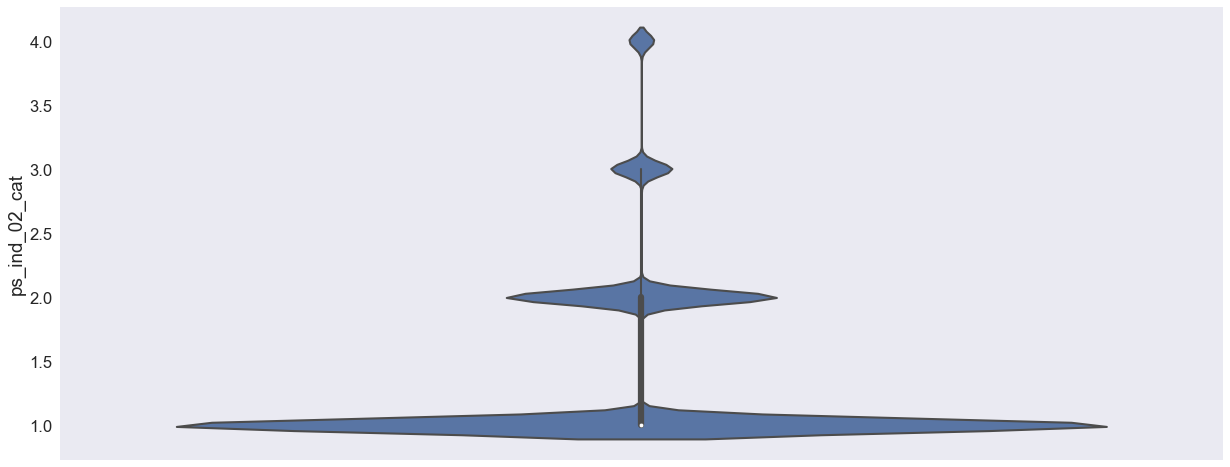

In [52]:
#gráficos violinplot de todas as features nominais
ax = sns.violinplot(y='ps_ind_02_cat',data=coluna_nominal_sample)

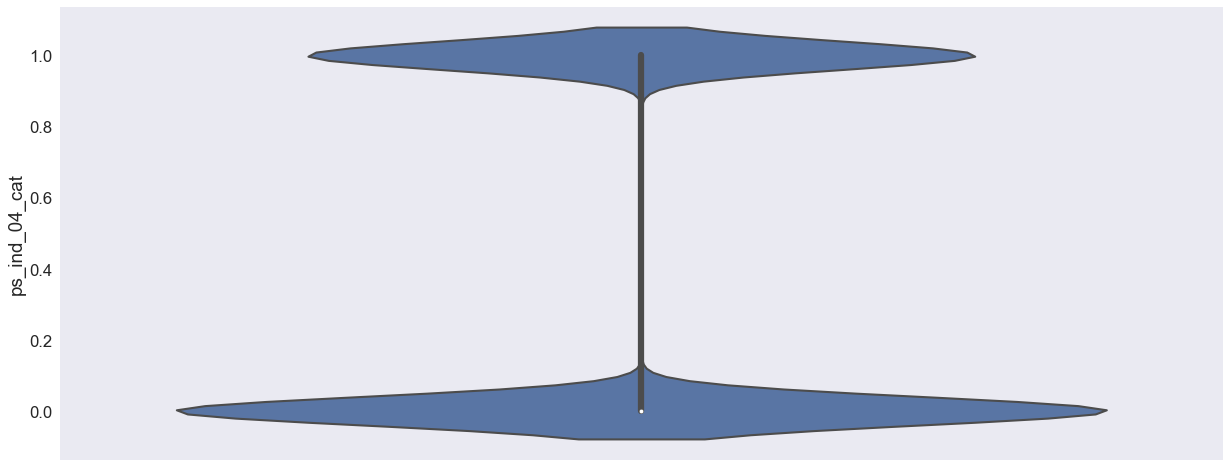

In [53]:
ax1 = sns.violinplot(y='ps_ind_04_cat',data=coluna_nominal_sample)

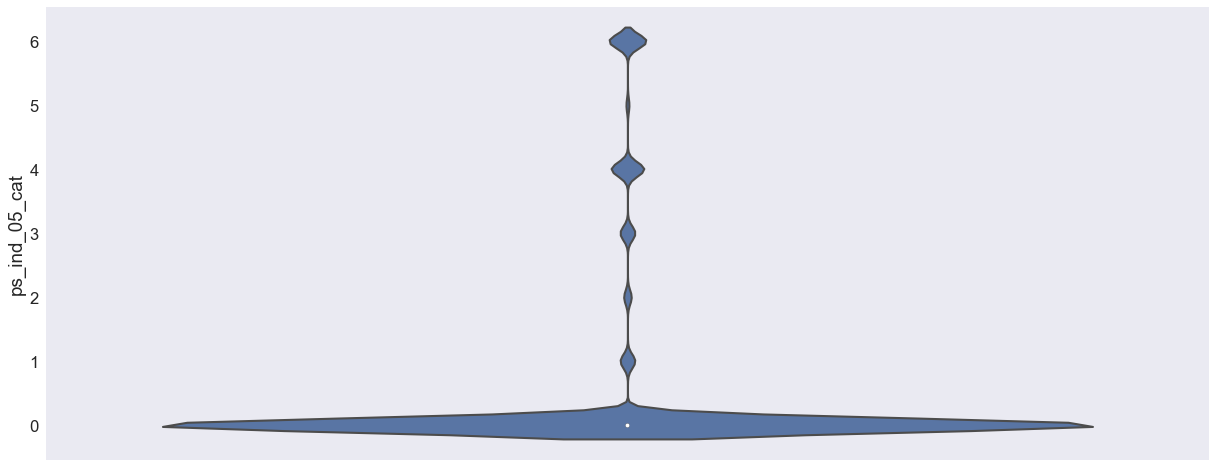

In [54]:
ax2 = sns.violinplot(y='ps_ind_05_cat',data=coluna_nominal_sample)

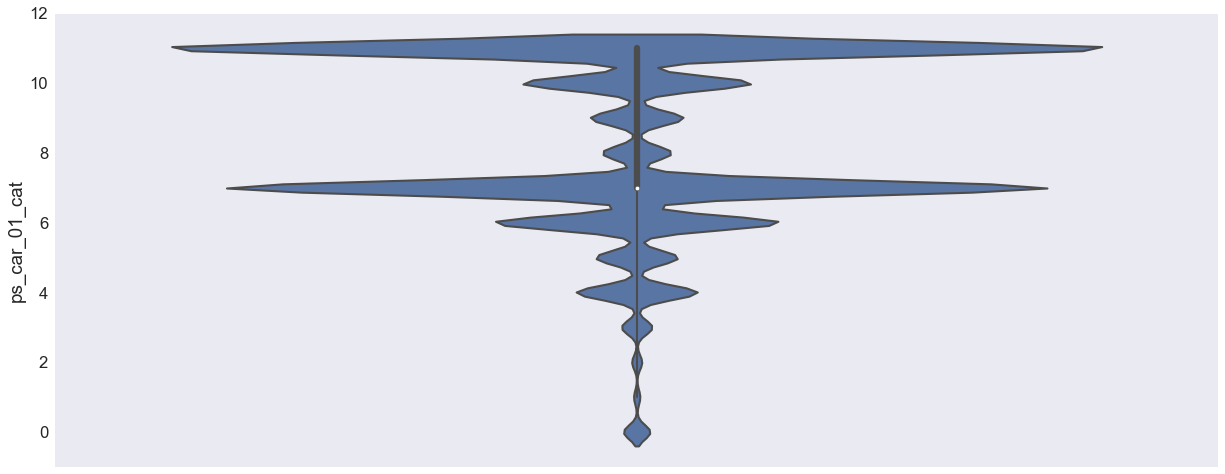

In [55]:
ax3 = sns.violinplot(y='ps_car_01_cat',data=coluna_nominal_sample)

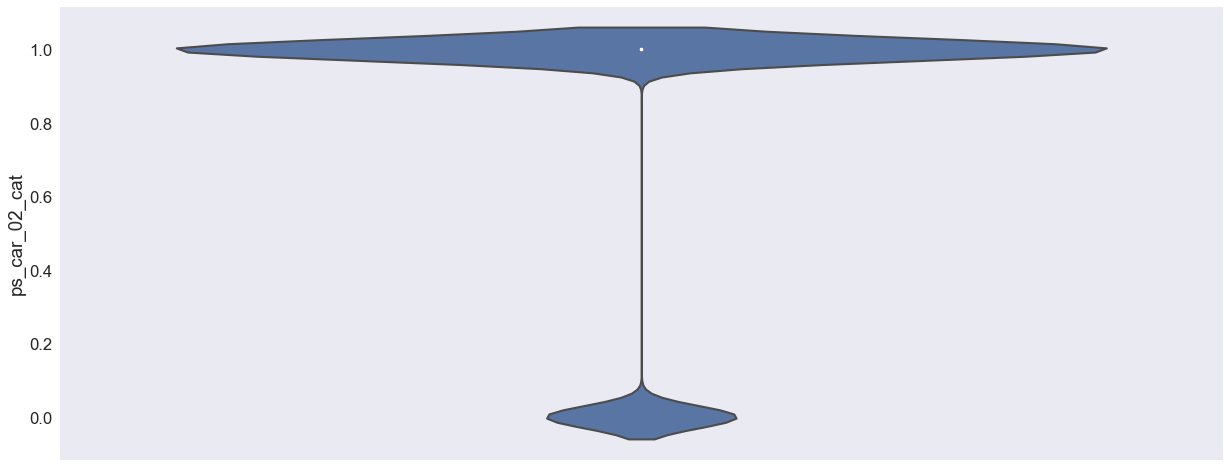

In [56]:
ax4 = sns.violinplot(y='ps_car_02_cat',data=coluna_nominal_sample)

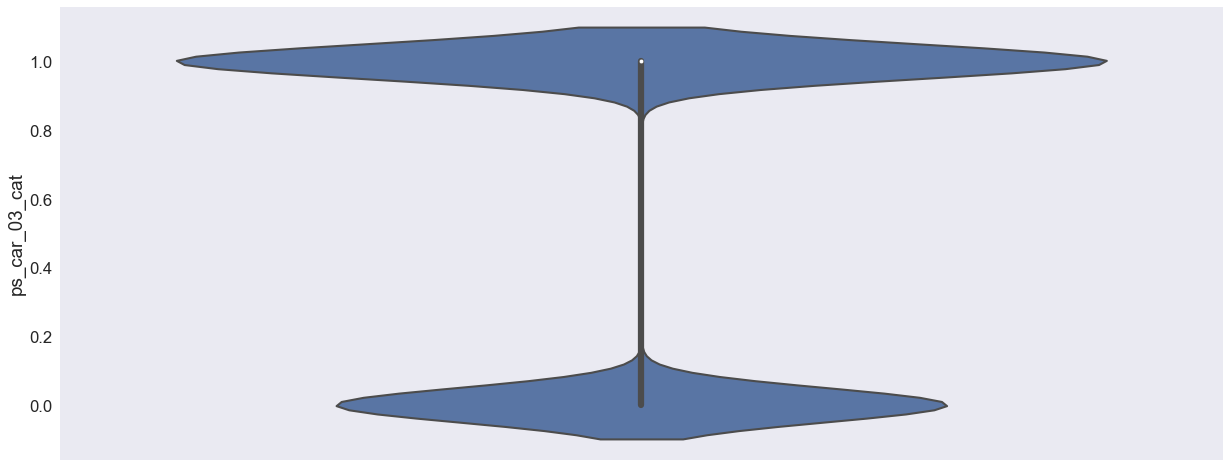

In [57]:
ax5 = sns.violinplot(y='ps_car_03_cat',data=coluna_nominal_sample)

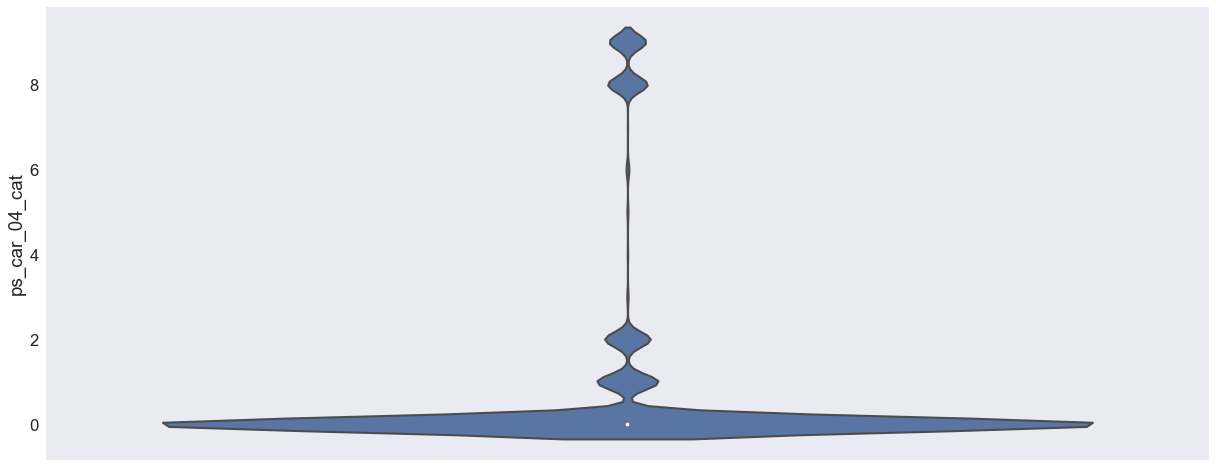

In [58]:
ax6 = sns.violinplot(y='ps_car_04_cat',data=coluna_nominal_sample)

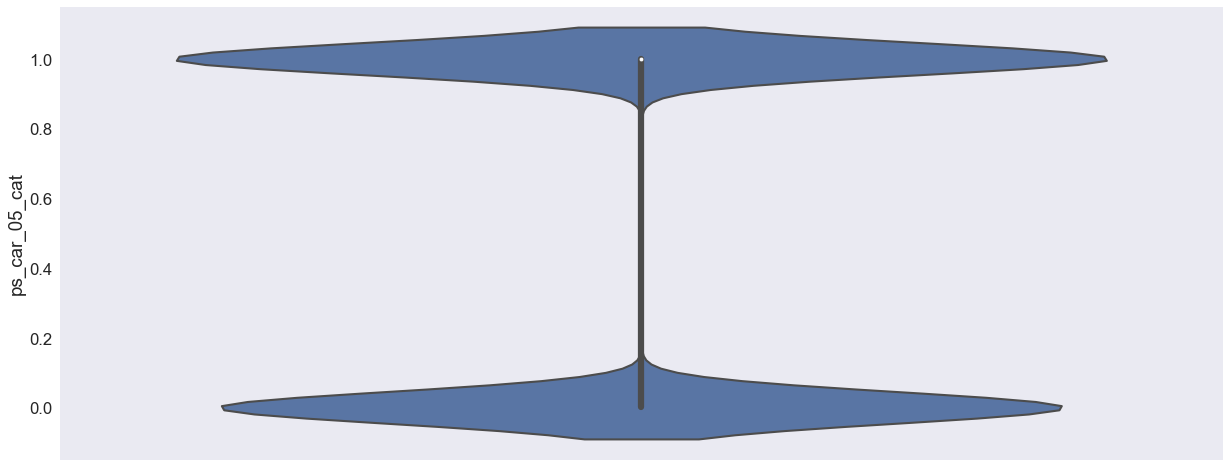

In [59]:
ax7 = sns.violinplot(y='ps_car_05_cat',data=coluna_nominal_sample)

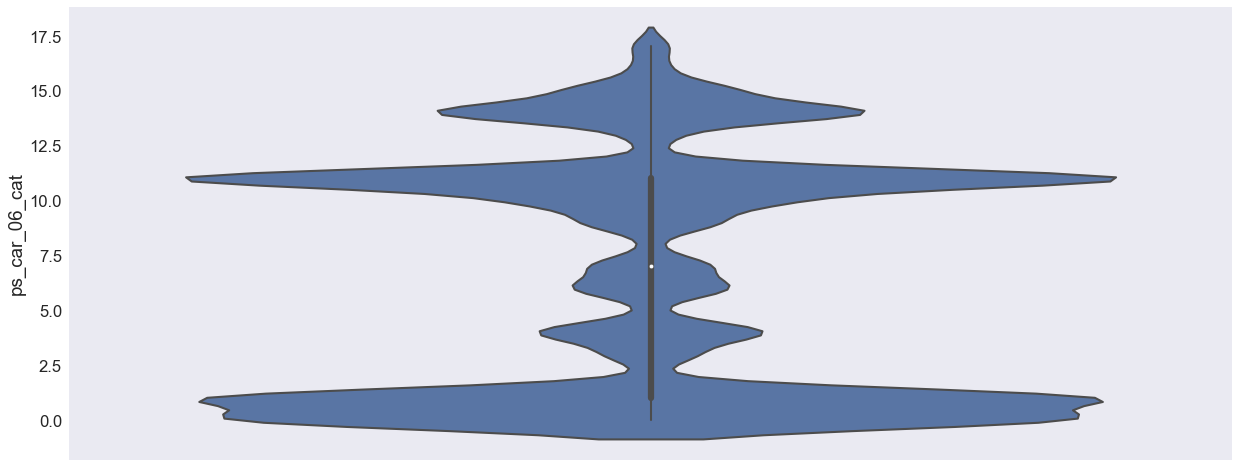

In [60]:
ax8 = sns.violinplot(y='ps_car_06_cat',data=coluna_nominal_sample)

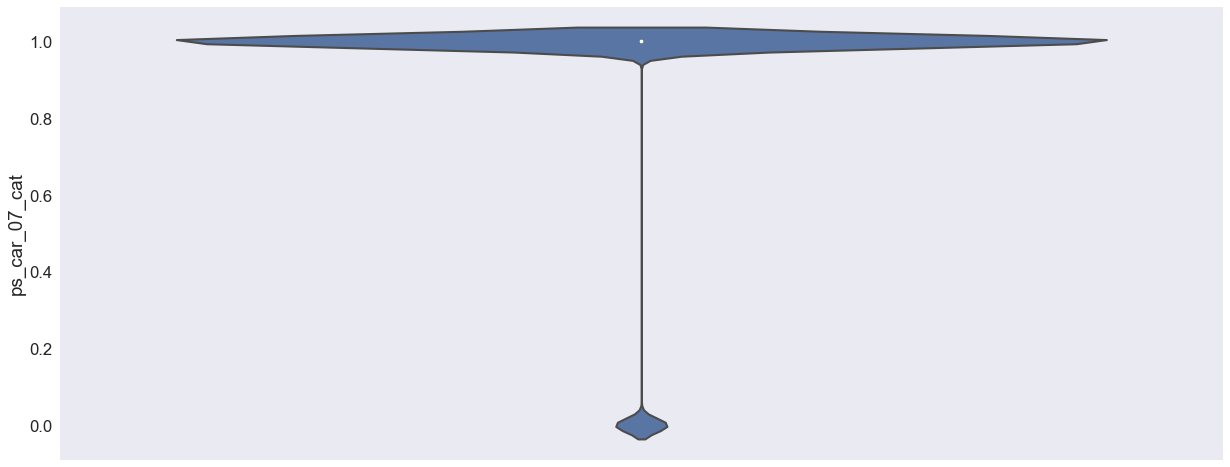

In [61]:
ax9 = sns.violinplot(y='ps_car_07_cat',data=coluna_nominal_sample)

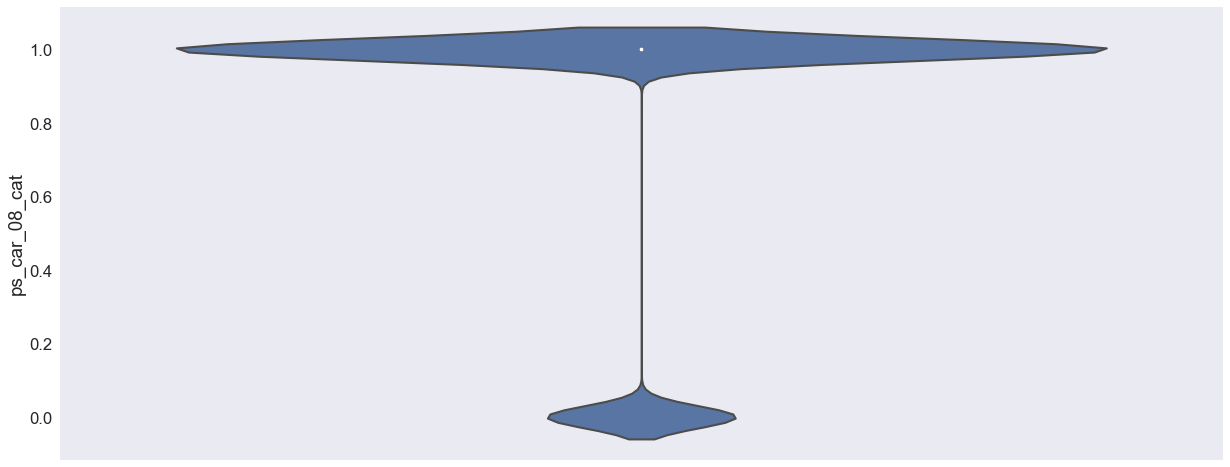

In [62]:
ax10 = sns.violinplot(y='ps_car_08_cat',data=coluna_nominal_sample)

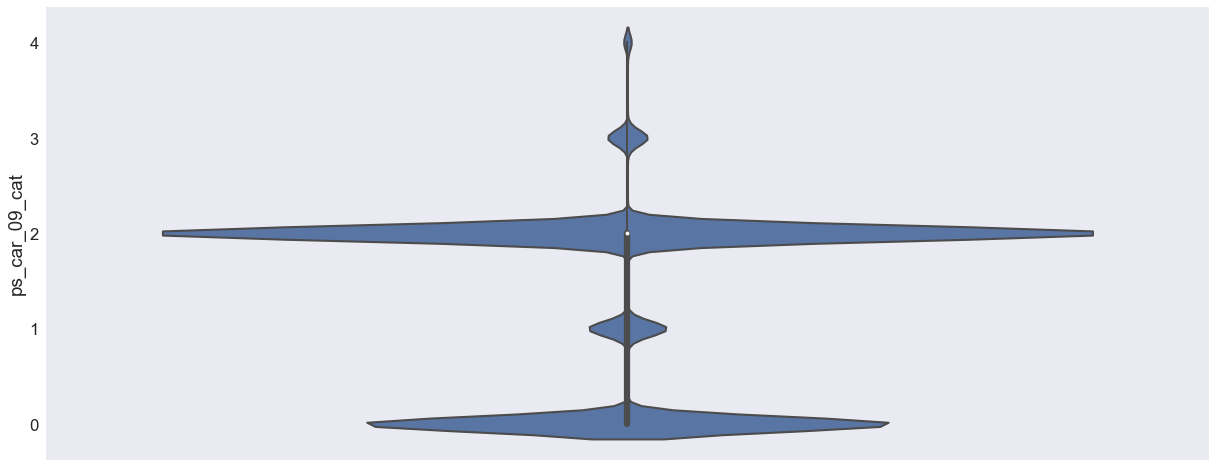

In [63]:
ax11 = sns.violinplot(y='ps_car_09_cat',data=coluna_nominal_sample)

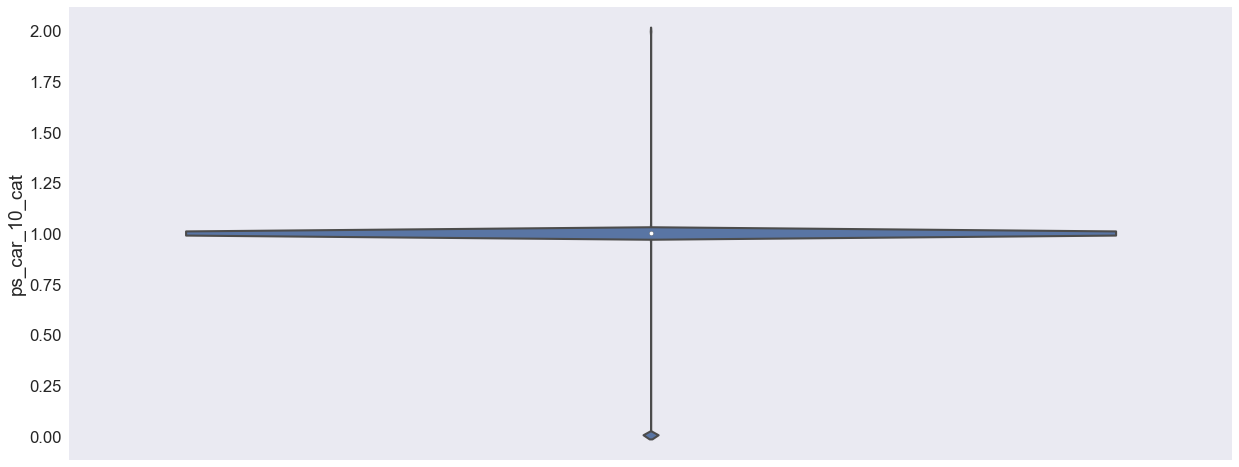

In [64]:
ax12 = sns.violinplot(y='ps_car_10_cat',data=coluna_nominal_sample)

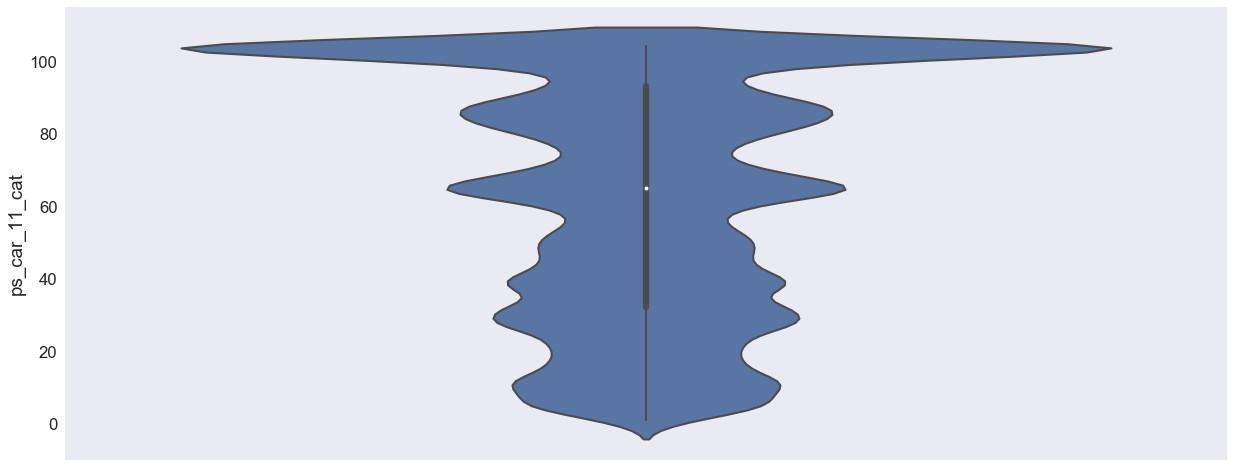

In [65]:
ax13 = sns.violinplot(y='ps_car_11_cat',data=coluna_nominal_sample)

### Variáveis Intervalares

In [66]:
#Função de correlação linear entre as variáveis intervalares por Bert Carremans
def corr_heatmap(v):
    correlations = full_data_missing[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
#Referência: http://seaborn.pydata.org/examples/many_pairwise_correlations.html
            #https://www.kaggle.com/bertcarremans/data-preparation-exploration

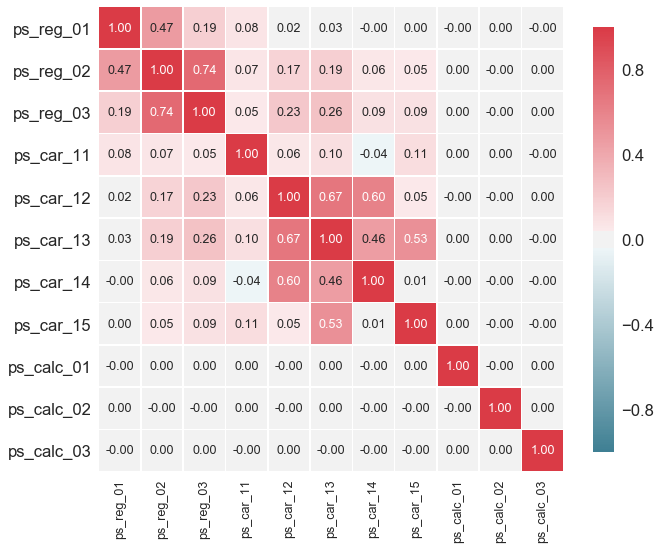

In [67]:
#Correlação linear entre as variáveis
corr_heatmap(col_intervalar)

In [68]:
#Função de correlação linear entre as variáveis intervalares por Bert Carremans
def corr_heatmap_ordinal(v):
    correlations = full_data_missing[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(22,15))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
#Referência: http://seaborn.pydata.org/examples/many_pairwise_correlations.html
            #https://www.kaggle.com/bertcarremans/data-preparation-exploration

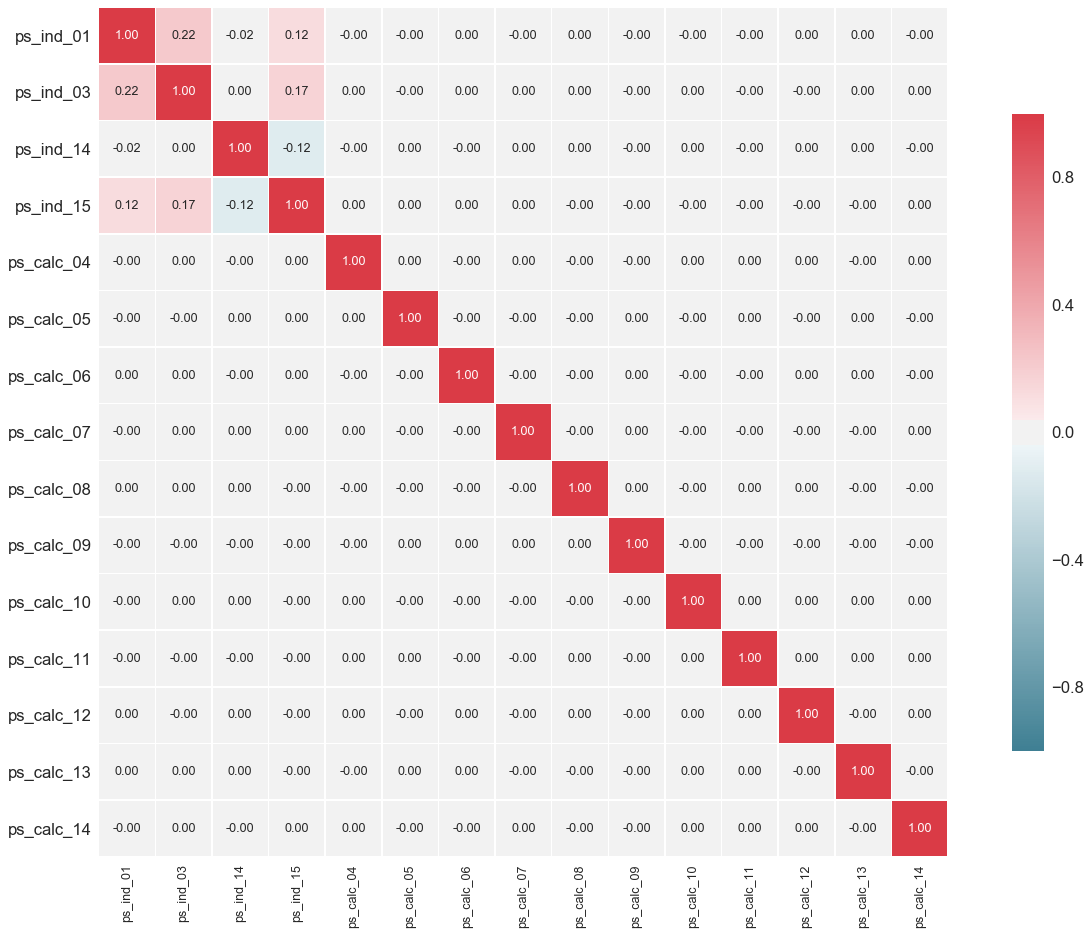

In [69]:
corr_heatmap_ordinal(col_ordinal)

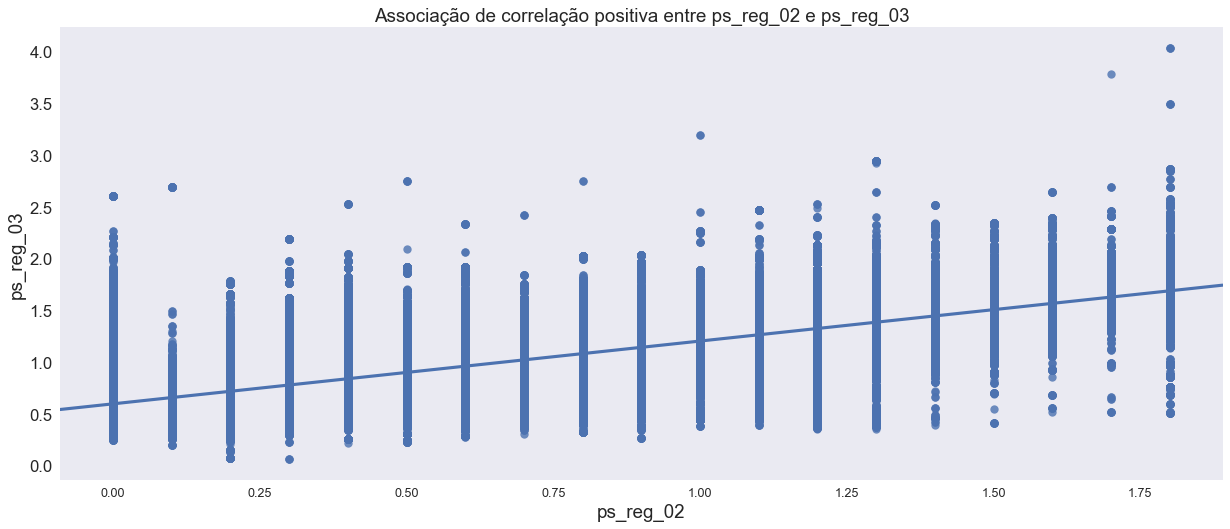

In [70]:
#Scatterplot
sns.regplot(x="ps_reg_02", y="ps_reg_03",
                 fit_reg=True, data=coluna_intervalar);
plt.xlabel('ps_reg_02');
plt.ylabel('ps_reg_03');
plt.title('Associação de correlação positiva entre ps_reg_02 e ps_reg_03');
plt.show()

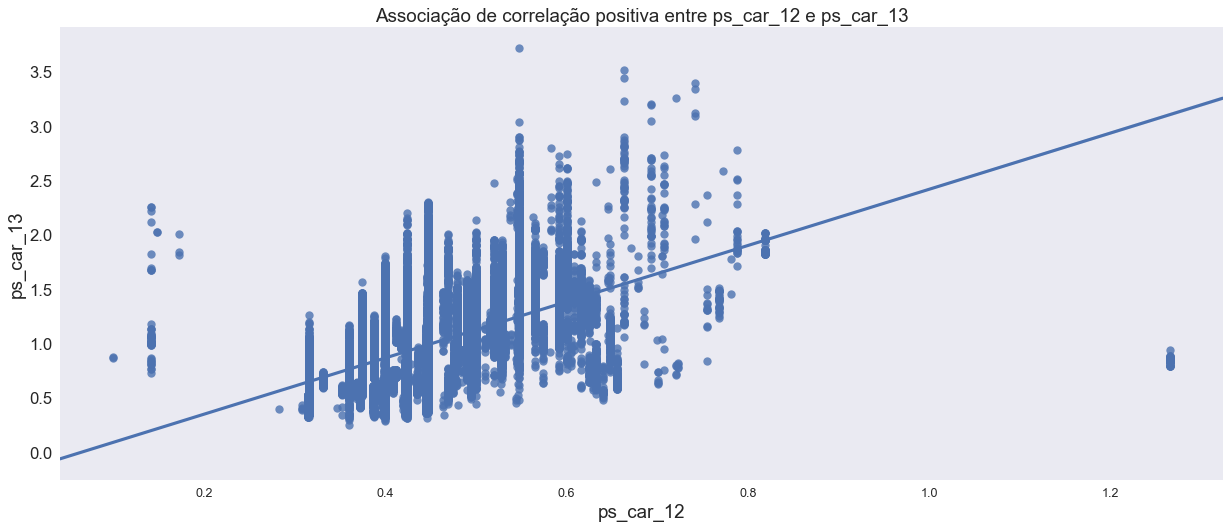

In [71]:
#ps_car_12 e ps_car13 
sns.regplot(x="ps_car_12", y="ps_car_13",
                 fit_reg=True, data=coluna_intervalar);
plt.xlabel('ps_car_12');
plt.ylabel('ps_car_13');
plt.title('Associação de correlação positiva entre ps_car_12 e ps_car_13');
plt.show()

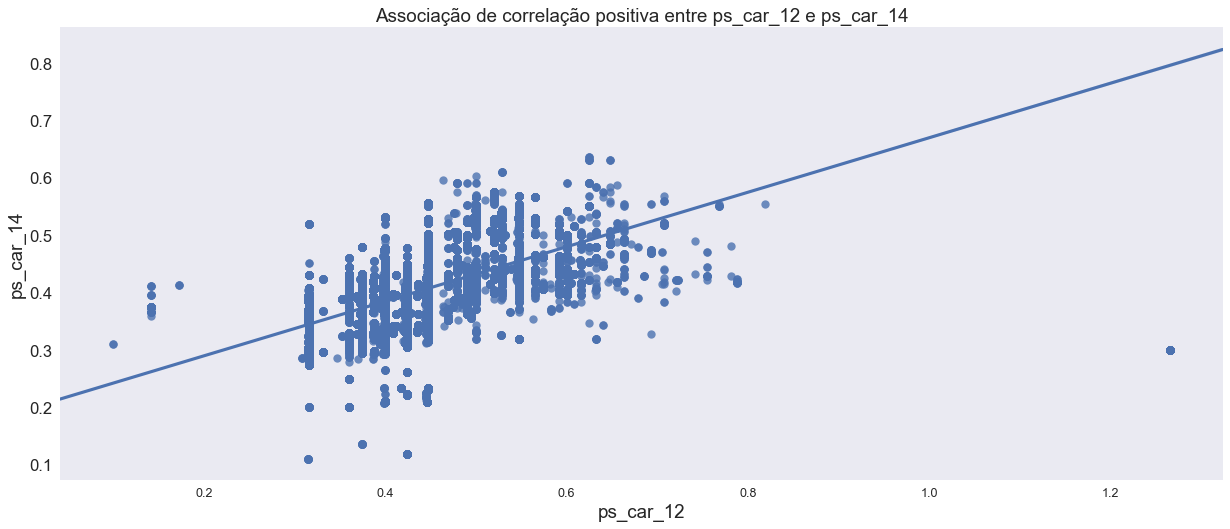

In [72]:
#ps_car_12 e ps_car_14 
sns.regplot(x="ps_car_12", y="ps_car_14",
                 fit_reg=True, data=coluna_intervalar);
plt.xlabel('ps_car_12');
plt.ylabel('ps_car_14');
plt.title('Associação de correlação positiva entre ps_car_12 e ps_car_14');
plt.show()

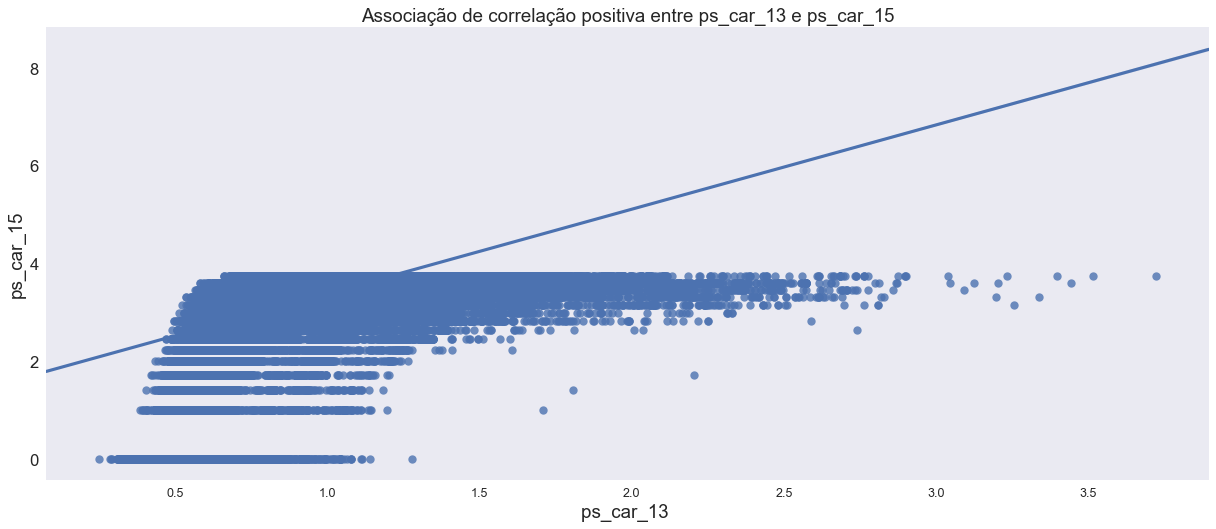

In [73]:
#ps_car_13 e ps_car_15 
sns.regplot(x="ps_car_13", y="ps_car_15",
                 fit_reg=True, data=coluna_intervalar);
plt.xlabel('ps_car_13 ');
plt.ylabel('ps_car_15');
plt.title('Associação de correlação positiva entre ps_car_13 e ps_car_15');
plt.show()